# Text Processing


In [11]:
import os

# Read in a plain text file
with open(os.path.join('sample.txt'), 'r') as f:
    text = f.read()
    print(text)

Apple Inc. is an American multinational technology company headquartered in Cupertino, California that designs, develops, and sells consumer electronics, computer software, and online services. The company's hardware products include the iPhone smartphone, the iPad tablet computer, the Mac personal computer, the iPod portable media player, the Apple Watch smartwatch, and the Apple TV digital media player. Apple's consumer software includes the macOS and iOS operating systems, the iTunes media player, the Safari web browser, and the iLife and iWork creativity and productivity suites. Its online services include the iTunes Store, the iOS App Store and Mac App Store, Apple Music, and iCloud.



In [ ]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("file_name.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

### Online Resource

In [12]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "We don't have to do all of it alone. We were never meant to.",
                "length": "60",
                "author": "Brene Brown",
                "tags": [
                    "inspire",
                    "teamwork"
                ],
                "category": "inspire",
                "language": "en",
                "date": "2021-08-28",
                "permalink": "https://theysaidso.com/quote/brene-brown-we-dont-have-to-do-all-of-it-alone-we-were-never-meant-to",
                "id": "DhdoxV10LeG_3pD82xMmEgeF",
                "background": "https://theysaidso.com/img/qod/qod-inspire.jpg",
                "title": "Inspiring Quote of the day"
            }
        ]
    },
    "baseurl": "https://theysaidso.com",
    "copyright": {
        "year": 2023,
        "url": "https://theysaidso.com"
    }
}
We don't have to do all of it alone. We were ne

## Cleaning

In [13]:
import requests

# Fetch a web page
r = requests.get("https://news.ycombinator.com")
print(r.text)

<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?Wioqzw1qYS0QVlWlv1P5">
        <link rel="shortcut icon" href="favicon.ico">
          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">
        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
              <a href="newest">new</a> | <a href="front">past</a> | <a href=

In [14]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank


        
          
        Hacker News
        
                  Hacker News
              new | past | comments | ask | show | jobs | submit            
                              login
                          
              

              
      1.      I hacked an office telephone to play DOOM (neilbostian.github.io)
        82 points by joshmanders 3 hours ago  | hide | 14&nbsp;comments              
      
                
      2.      The Evolution of Smalltalk from Smalltalk-72 to Squeak [video] (pldi21.org)
        151 points by gjvc 9 hours ago  | hide | 37&nbsp;comments              
      
                
      3.      Some Reasons to Measure (danluu.com)
        78 points by cdwhite 6 hours ago  | hide | 6&nbsp;comments              
      
                
      4.      Zero Shot Object Tracking (roboflow.com)
        30 points by jonbaer 4 hours ago  | hide | 3&nbsp;comments              
      
                
      5.      Launch HN: Hotswap (YC S21) – Easil

In [15]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.get_text())


        
          
        Hacker News
        
                  Hacker News
              new | past | comments | ask | show | jobs | submit            
                              login
                          
              

              
      1.      I hacked an office telephone to play DOOM (neilbostian.github.io)
        82 points by joshmanders 3 hours ago  | hide | 14 comments              
      
                
      2.      The Evolution of Smalltalk from Smalltalk-72 to Squeak [video] (pldi21.org)
        151 points by gjvc 9 hours ago  | hide | 37 comments              
      
                
      3.      Some Reasons to Measure (danluu.com)
        78 points by cdwhite 6 hours ago  | hide | 6 comments              
      
                
      4.      Zero Shot Object Tracking (roboflow.com)
        30 points by jonbaer 4 hours ago  | hide | 3 comments              
      
                
      5.      Launch HN: Hotswap (YC S21) – Easily migrate customers 

In [16]:
# Find all articles
summaries = soup.find_all("tr", class_="athing")
summaries[0]

<tr class="athing" id="28327022">
      <td align="right" class="title" valign="top"><span class="rank">1.</span></td>      <td class="votelinks" valign="top"><center><a href="vote?id=28327022&amp;how=up&amp;goto=news" id="up_28327022"><div class="votearrow" title="upvote"></div></a></center></td><td class="title"><a class="storylink" href="https://neilbostian.github.io/#/doomphone">I hacked an office telephone to play DOOM</a><span class="sitebit comhead"> (<a href="from?site=neilbostian.github.io"><span class="sitestr">neilbostian.github.io</span></a>)</span></td></tr>

In [17]:
# Extract title
summaries[0].find("a", class_="storylink").get_text().strip()

'I hacked an office telephone to play DOOM'

In [18]:
# Find all articles, extract titles
articles = []
summaries = soup.find_all("tr", class_="athing")
for summary in summaries:
    title = summary.find("a", class_="storylink").get_text().strip()
    articles.append((title))

print(len(articles), "Article summaries found. Sample:")
print(articles[0])

30 Article summaries found. Sample:
I hacked an office telephone to play DOOM


## Normalization

### Case Normalization

In [19]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [20]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [21]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [22]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [212]:
import os
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.data.path.append(os.path.join(os.getcwd(), "nltk_data"))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\bluecoder\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bluecoder\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bluecoder\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bluecoder\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bluecoder\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\bluecoder\AppData\Roaming\nltk_data...
[nltk_data]   Pack

In [2]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [3]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [4]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [5]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
# Reset text
import re
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [8]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Stemming & Lemmatization

### Stemming

In [9]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [11]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']


# Named Entity Using NTLK

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [5]:
sent= '''Prime Minister Jacinda Ardern has claimed that New Zealand had won a big battle over the spread of coronavirus. Her words came as the country begins to exit from its lockdown.'''
words= word_tokenize(sent)
postags=pos_tag(words)

In [6]:
ne_tree = nltk.ne_chunk(postags,binary=True)
print(ne_tree)

(S
  Prime/NNP
  Minister/NNP
  (NE Jacinda/NNP Ardern/NNP)
  has/VBZ
  claimed/VBN
  that/IN
  (NE New/NNP Zealand/NNP)
  had/VBD
  won/VBN
  a/DT
  big/JJ
  battle/NN
  over/IN
  the/DT
  spread/NN
  of/IN
  coronavirus/NN
  ./.
  Her/PRP$
  words/NNS
  came/VBD
  as/IN
  the/DT
  country/NN
  begins/VBZ
  to/TO
  exit/VB
  from/IN
  its/PRP$
  lockdown/NN
  ./.)


# Named Entity Using SpaCy

In [2]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [2]:
raw_text="The Indian Space Research Organisation or is the national space agency of India, headquartered in Bengaluru. It operates under Department of Space which is directly overseen by the Prime Minister of India while Chairman of ISRO acts as executive of DOS as well."

In [3]:
text1= NER(raw_text)
for word in text1.ents:
    print(word.text,word.label_)

The Indian Space Research Organisation ORG
India GPE
Bengaluru GPE
Department of Space ORG
India GPE
ISRO ORG
DOS ORG


In [5]:
spacy.explain("GPE")

'Countries, cities, states'

In [4]:
displacy.render(text1,style="ent",jupyter=True)

# Text Preprocessing

In [115]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from wordcloud import WordCloud
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [116]:
df = pd.read_csv('result.csv')

In [117]:
df.columns

Index(['sent_id', 'text', 'opinions/0/Target/0/0', 'opinions/0/Target/1/0',
       'opinions/0/Polar_expression/0/0', 'opinions/0/Polar_expression/1/0',
       'opinions/0/Polarity', 'opinions/0/Intensity', 'opinions/0/Source/0/0',
       'opinions/0/Source/1/0',
       ...
       'opinions/15/Polar_expression/0/0', 'opinions/15/Polar_expression/1/0',
       'opinions/15/Polarity', 'opinions/15/Intensity',
       'opinions/16/Target/0/0', 'opinions/16/Target/1/0',
       'opinions/16/Polar_expression/0/0', 'opinions/16/Polar_expression/1/0',
       'opinions/16/Polarity', 'opinions/16/Intensity'],
      dtype='object', length=124)

In [118]:
df

,sent_id,text,opinions/0/Target/0/0,opinions/0/Target/1/0,opinions/0/Polar_expression/0/0,opinions/0/Polar_expression/1/0,opinions/0/Polarity,opinions/0/Intensity,opinions/0/Source/0/0,opinions/0/Source/1/0,...,opinions/15/Polar_expression/0/0,opinions/15/Polar_expression/1/0,opinions/15/Polarity,opinions/15/Intensity,opinions/16/Target/0/0,opinions/16/Target/1/0,opinions/16/Polar_expression/0/0,opinions/16/Polar_expression/1/0,opinions/16/Polarity,opinions/16/Intensity
0,../opener/en/kaf/hotel/english00192_e3fe22eeb3...,Experienced staff and had a memorable stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,../opener/en/kaf/hotel/english00192_e3fe22eeb3...,India as a country has always fascinated me an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,../opener/en/kaf/hotel/english00192_e3fe22eeb3...,One of my friends who had been there before wa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,../opener/en/kaf/hotel/english00192_e3fe22eeb3...,"Yes , it really was a great experience and we ...",the Oberoi Udaivilas Luxury Hotel,125:158,the most wonderful part of the trip,73:108,Positive,Standard,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,../opener/en/kaf/hotel/english00192_e3fe22eeb3...,I can ’t explain in words how grand this place...,this place,36:46,how grand looks,26:52,Positive,Standard,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,../opener/en/kaf/hotel/english00011_0b57ac0ca8...,"Hotel offers nice spa , large pool area and en...",Hotel,0:5,offers,6:12,Positive,Standard,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1741,../opener/en/kaf/hotel/english00011_0b57ac0ca8...,Hospitality and services at the highest level .,Hospitality,0:11,at the highest level,25:45,Positive,Strong,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1742,../opener/en/kaf/hotel/english00011_0b57ac0ca8...,I will definitely come back !,NaN,NaN,will definitely come back !,2:29,Positive,Strong,I,0:1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1743,../opener/en/kaf/hotel/english00011_0b57ac0ca8...,;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df.describe()

,sent_id,text,opinions/0/Target/0/0,opinions/0/Target/1/0,opinions/0/Polar_expression/0/0,opinions/0/Polar_expression/1/0,opinions/0/Polarity,opinions/0/Intensity,opinions/0/Source/0/0,opinions/0/Source/1/0,...,opinions/15/Polar_expression/0/0,opinions/15/Polar_expression/1/0,opinions/15/Polarity,opinions/15/Intensity,opinions/16/Target/0/0,opinions/16/Target/1/0,opinions/16/Polar_expression/0/0,opinions/16/Polar_expression/1/0,opinions/16/Polarity,opinions/16/Intensity
count,1745,1745,1260,1260,1400,1400,1400,1400,150,150,...,2,2,2,2,2,2,2,2,2,2
unique,1745,1700,667,633,937,817,2,2,7,54,...,2,2,1,1,2,2,2,2,1,2
top,../opener/en/kaf/hotel/english00041_2d00f34ba5...,"Friendly , helpful hosts",hotel,0:9,good,0:4,Positive,Standard,I,0:1,...,clean,24:29,Positive,Standard,room,205:209,Fantastic,34:43,Positive,Strong
freq,1,2,73,82,40,51,1012,935,69,43,...,1,1,2,2,1,1,1,1,2,1


## Subtask - 1
## Building model for predicting polarity of given review

### Basic Data Preprocessing

In [120]:
df.drop(['sent_id'],axis=1,inplace = True)

In [121]:
df.columns

Index(['text', 'opinions/0/Target/0/0', 'opinions/0/Target/1/0',
       'opinions/0/Polar_expression/0/0', 'opinions/0/Polar_expression/1/0',
       'opinions/0/Polarity', 'opinions/0/Intensity', 'opinions/0/Source/0/0',
       'opinions/0/Source/1/0', 'opinions/1/Polar_expression/0/0',
       ...
       'opinions/15/Polar_expression/0/0', 'opinions/15/Polar_expression/1/0',
       'opinions/15/Polarity', 'opinions/15/Intensity',
       'opinions/16/Target/0/0', 'opinions/16/Target/1/0',
       'opinions/16/Polar_expression/0/0', 'opinions/16/Polar_expression/1/0',
       'opinions/16/Polarity', 'opinions/16/Intensity'],
      dtype='object', length=123)

In [122]:
df2 = df.iloc[:,[0,5]]
df_intensity = df.iloc[:,[0,5,6]]

In [123]:
df2 = df2.rename({'text': 'Text', 'opinions/0/Polarity': 'Polarity'}, axis=1)
df_intensity = df_intensity.rename({'text': 'Text', 'opinions/0/Polarity': 'Polarity','opinions/0/Intensity':'Intensity'},axis=1)
df2.head()

,Text,Polarity
0,Experienced staff and had a memorable stay,NaN
1,India as a country has always fascinated me an...,NaN
2,One of my friends who had been there before wa...,NaN
3,"Yes , it really was a great experience and we ...",Positive
4,I can ’t explain in words how grand this place...,Positive


In [124]:
df_intensity.head()

,Text,Polarity,Intensity
0,Experienced staff and had a memorable stay,NaN,NaN
1,India as a country has always fascinated me an...,NaN,NaN
2,One of my friends who had been there before wa...,NaN,NaN
3,"Yes , it really was a great experience and we ...",Positive,Standard
4,I can ’t explain in words how grand this place...,Positive,Standard


In [125]:
df2.describe()

,Text,Polarity
count,1745,1400
unique,1700,2
top,"Friendly , helpful hosts",Positive
freq,2,1012


In [126]:
df2.isnull().sum()

Text          0
Polarity    345
dtype: int64

In [127]:
df2.dropna(axis=0,inplace=True)
df_intensity.dropna(axis=0,inplace=True)
print(df2.isnull().values.any())
print(df_intensity.isnull().values.any())

False
False


In [128]:
df2.reset_index(drop=True,inplace=True)
df_intensity.reset_index(drop=True,inplace=True)
df_intensity

,Text,Polarity,Intensity
0,"Yes , it really was a great experience and we ...",Positive,Standard
1,I can ’t explain in words how grand this place...,Positive,Standard
2,It is a unique blend of the old world royal ch...,Positive,Strong
3,I ’m definitely going there again whenever I g...,Positive,Strong
4,Bit pricey and but away from center,Negative,Standard
...,...,...,...
1395,Golf courses can be easily reached from the ho...,Positive,Standard
1396,"Hotel offers nice spa , large pool area and en...",Positive,Standard
1397,Hospitality and services at the highest level .,Positive,Strong
1398,I will definitely come back !,Positive,Strong


In [129]:
df2['Text'][1]

'I can ’t explain in words how grand this place looks .'

In [130]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df2['Text']=df2['Text'].apply(denoise_text)
df_intensity['Text']=df_intensity['Text'].apply(denoise_text)

In [131]:
def remove_special_characters(text,remove_digit=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

df2['Text'] = df2['Text'].apply(remove_special_characters)
df_intensity['Text'] = df_intensity['Text'].apply(remove_special_characters)

In [132]:
df2.head()

,Text,Polarity
0,Yes it really was a great experience and we v...,Positive
1,I can t explain in words how grand this place ...,Positive
2,It is a unique blend of the old world royal ch...,Positive
3,I m definitely going there again whenever I ge...,Positive
4,Bit pricey and but away from center,Negative


In [133]:
# Normalising the data

In [134]:
def Capital_to_lower(text):
    return text.lower()

df2['Text'] = df2.Text.apply(Capital_to_lower)
df_intensity['Text'] = df_intensity.Text.apply(Capital_to_lower)

In [135]:
df2.head()

,Text,Polarity
0,yes it really was a great experience and we v...,Positive
1,i can t explain in words how grand this place ...,Positive
2,it is a unique blend of the old world royal ch...,Positive
3,i m definitely going there again whenever i ge...,Positive
4,bit pricey and but away from center,Negative


## Advanced Preprocessing

In [136]:
#stopword removal
sw = stopwords.words("english")
print(sw)
tokenizer=ToktokTokenizer()

def removeStopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in sw]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
df3 = df2.copy()
df2['Text'] = df2['Text'].apply(removeStopwords)
df_intensity['Text'] = df_intensity['Text'].apply(removeStopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [137]:
df3

,Text,Polarity
0,yes it really was a great experience and we v...,Positive
1,i can t explain in words how grand this place ...,Positive
2,it is a unique blend of the old world royal ch...,Positive
3,i m definitely going there again whenever i ge...,Positive
4,bit pricey and but away from center,Negative
...,...,...
1395,golf courses can be easily reached from the ho...,Positive
1396,hotel offers nice spa large pool area and eno...,Positive
1397,hospitality and services at the highest level,Positive
1398,i will definitely come back,Positive


In [138]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
df_stemmer = df2.copy()
df_stemmer['Text']=df_stemmer['Text'].apply(simple_stemmer)
df_intensity['Text']=df_intensity['Text'].apply(simple_stemmer)

In [139]:
#Lemmatization
def simple_lemmatization(text):
    lm=WordNetLemmatizer()
    text= ' '.join([lm.lemmatize(word) for word in text.split()])
    return text
df_lemm = df2.copy()
df_lemm['Text']=df_lemm['Text'].apply(simple_lemmatization)
df_intensity['Text']=df_intensity['Text'].apply(simple_lemmatization)

In [140]:
df_lemm.head()

,Text,Polarity
0,yes really great experience visited various pl...,Positive
1,explain word grand place look,Positive
2,unique blend old world royal charm modern luxury,Positive
3,definitely going whenever get chance,Positive
4,bit pricey away center,Negative


# Polarity with intensity

In [141]:
df_intensity["Polarity"] = df_intensity["Polarity"].apply(lambda x: 1 if x == 'Positive' else 0)

In [142]:
df_intensity['Intensity'] = df_intensity['Intensity'].apply(lambda x: 1 if x=='Strong' else 0)
#strong: 1, Standard: 0

In [143]:
df_intensity.head()

,Text,Polarity,Intensity
0,ye realli great experi visit variou place wond...,1,0
1,explain word grand place look,1,0
2,uniqu blend old world royal charm modern luxuri,1,1
3,definit go whenev get chanc,1,1
4,bit pricey away center,0,0


## Visualisation 

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df_lemm['Polarity'].value_counts()

Positive    1012
Negative     388
Name: Polarity, dtype: int64

# Modeling

In [146]:
df_lemm.shape

(1400, 2)

In [147]:
train_reviews = df_lemm.Text[:1350]
test_reviews = df_lemm.Text[1350:]

In [148]:
print(train_reviews.shape)
print(test_reviews.shape)

(1350,)
(50,)


### Bag of word (BOW) and TF-IDF

In [149]:
#Count Vectorizer
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(train_reviews)
cv_test_reviews=cv.transform(test_reviews)

#TF-IDF vectorizer
#It is used to convert text documents to matrix of tfidf features
tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(train_reviews)
tv_test_reviews = tv.transform(test_reviews)

In [150]:
print('Count Vectorizer:')
print(cv_train_reviews.shape)
print(cv_test_reviews.shape)

print("Tf-Idf Vectorizer")
print(tv_train_reviews.shape)
print(tv_test_reviews.shape)

Count Vectorizer:
(1350, 13611)
(50, 13611)
Tf-Idf Vectorizer
(1350, 13611)
(50, 13611)


In [151]:
#getting Vocablary of tf-idf
print(tv.vocabulary_)

{'yes': 13585, 'oberoi': 8505, 'udaivilas': 12756, 'yes really': 13586, 'experience visited': 4192, 'visited various': 13020, 'various place': 12908, 'place wonderful': 9169, 'wonderful part': 13420, 'part trip': 8918, 'trip stay': 12660, 'stay oberoi': 11696, 'oberoi udaivilas': 8506, 'udaivilas luxury': 12757, 'luxury hotel': 7424, 'yes really great': 13587, 'really great experience': 9743, 'great experience visited': 5386, 'experience visited various': 4193, 'visited various place': 13021, 'various place wonderful': 12909, 'place wonderful part': 9170, 'wonderful part trip': 13421, 'part trip stay': 8919, 'trip stay oberoi': 12661, 'stay oberoi udaivilas': 11697, 'oberoi udaivilas luxury': 8507, 'udaivilas luxury hotel': 12758, 'explain': 4204, 'explain word': 4205, 'word grand': 13428, 'grand place': 5360, 'place look': 9144, 'explain word grand': 4206, 'word grand place': 13429, 'grand place look': 5361, 'blend': 1487, 'royal': 10521, 'charm': 2082, 'unique blend': 12799, 'blend o

## Labelling the sentiment

In [152]:
#Labelling the sentiment analysis
lb=LabelBinarizer()
sentiment_data=lb.fit_transform(df_lemm['Polarity'])
print(sentiment_data.shape)

(1400, 1)


In [153]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:1350]
test_sentiments=sentiment_data[1350:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


## Logistic Regression

In [154]:
## Logistic Regression
lr=LogisticRegression(penalty='l2',max_iter=100,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,np.ravel(train_sentiments))
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,np.ravel(train_sentiments))
print(lr_tfidf)

LogisticRegression(random_state=42)
LogisticRegression(random_state=42)


In [155]:
#Predicting the model for bag of words
lr_bow_predict=lr_bow.predict(cv_test_reviews)
print(lr_bow_predict)

#predicting the model for tf-idf
lr_tfidf_predict = lr_tfidf.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [156]:
#accuracy score for bow features
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.74
lr_tfidf_score : 0.74


In [43]:
#confusion matrix for bag of words
lr_cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(lr_cm_bow)

#confusion matrix for tfidf features
lr_cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(lr_cm_tfidf)

[[37  0]
 [13  0]]
[[37  0]
 [13  0]]


(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

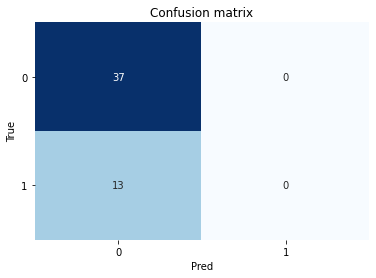

In [157]:
classes = np.unique(test_sentiments)
fig, ax = plt.subplots()
sns.heatmap(lr_cm_bow, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [44]:
result ={} 
result["Logistic Regression BOW"] =lr_bow_score
result["Logistic Regression TFidf"] =lr_tfidf_score

In [50]:
from sklearn.metrics import classification_report
print(classification_report(test_sentiments,lr_tfidf_predict,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.74      1.00      0.85        37
           0       0.00      0.00      0.00        13

    accuracy                           0.74        50
   macro avg       0.37      0.50      0.43        50
weighted avg       0.55      0.74      0.63        50



### Stocastic gradient decent 

In [55]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,np.ravel(train_sentiments))
print(svm_bow)

#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,np.ravel(train_sentiments))
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [56]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [57]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.76
svm_tfidf_score : 0.76


In [58]:
#confusion matrix for bag of words
sgd_cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
sgd_cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

NameError: name 'cm_bow' is not defined

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

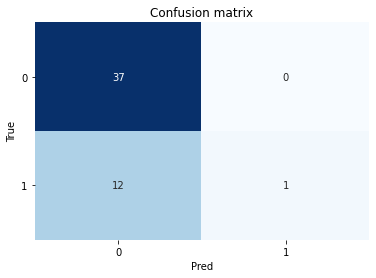

In [59]:
classes = np.unique(test_sentiments)
fig, ax = plt.subplots()
sns.heatmap(sgd_cm_bow, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [60]:
result["SGD BOW"] =svm_bow_score
result["SGD TF-IDF"] =svm_tfidf_score

## Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [62]:
#fitting naive model for bow
nb_bow = nb.fit(cv_train_reviews.toarray(),np.ravel(train_sentiments))

#fitting naive model for tf-idf
nb_tfidf = nb.fit(cv_train_reviews.toarray(),np.ravel(train_sentiments))

In [63]:
#Predicting the model for bag of words
nb_bow_predict=nb_bow.predict(cv_test_reviews.toarray())
print(nb_bow_predict)

#Predicting the model for tf-idf
nb_tfidf_predict=nb_tfidf.predict(cv_test_reviews.toarray())
print(nb_bow_predict)

[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 0 0]


In [66]:
from sklearn.metrics import accuracy_score
# Accuracy 
nb_bow_score = accuracy_score(test_sentiments, nb_bow_predict)
print("Naive bayes Score:",nb_bow_score)

#Accuracy score for tfidf features
nb_tfidf_score=accuracy_score(test_sentiments,nb_tfidf_predict)
print("Naive_tfidf_score :",nb_tfidf_score)

Naive bayes Score: 0.5
Naive_tfidf_score : 0.5


In [67]:
#confusion matrix for bag of words
nb_cm_bow=confusion_matrix(test_sentiments,nb_bow_predict,labels=[1,0])
print(nb_cm_bow)

[[15 22]
 [ 3 10]]


(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

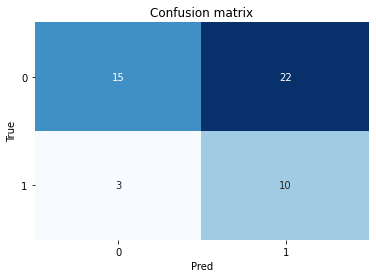

In [68]:
classes = np.unique(test_sentiments)
fig, ax = plt.subplots()
sns.heatmap(nb_cm_bow, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [69]:
result["Naive bias BOW"] =nb_bow_score
result["Naive bias TF-IDF"] =nb_tfidf_score

In [70]:
from sklearn.metrics import classification_report
print(classification_report(test_sentiments,nb_bow_predict,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.83      0.41      0.55        37
           0       0.31      0.77      0.44        13

    accuracy                           0.50        50
   macro avg       0.57      0.59      0.49        50
weighted avg       0.70      0.50      0.52        50



## Random Forest 

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
scores = cross_val_score(rf,cv_train_reviews,np.ravel(train_sentiments),cv=5)

In [160]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [161]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(cv_train_reviews,np.ravel(train_sentiments))
print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.722 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.722 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.722 (+/-0.0) for {'max_depth': 2, 'n_estimators': 100}
0.722 (+/-0.0) for {'max_depth': 10, 'n_estimators': 5}
0.722 (+/-0.0) for {'max_depth': 10, 'n_estimators': 50}
0.722 (+/-0.0) for {'max_depth': 10, 'n_estimators': 100}
0.722 (+/-0.0) for {'max_depth': 20, 'n_estimators': 5}
0.722 (+/-0.0) for {'max_depth': 20, 'n_estimators': 50}
0.722 (+/-0.0) for {'max_depth': 20, 'n_estimators': 100}
0.722 (+/-0.0) for {'max_depth': None, 'n_estimators': 5}
0.722 (+/-0.0) for {'max_depth': None, 'n_estimators': 50}
0.722 (+/-0.0) for {'max_depth': None, 'n_estimators': 100}


In [162]:
rf_bow = RandomForestClassifier(n_estimators=5,max_depth=2)
rf_bow.fit(cv_train_reviews,np.ravel(train_sentiments))
rf_bow_predict = rf_bow.predict(cv_test_reviews)

In [163]:
# Accuracy 
accuracy = accuracy_score(test_sentiments, rf_bow_predict)
print("Random forest Score:",accuracy*100)

Random forest Score: 74.0


In [164]:
rf_bow_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [166]:
#confusion matrix for bag of words
nb_cm_bow=confusion_matrix(test_sentiments,rf_bow_predict,labels=[1,0])
print(nb_cm_bow)

[[37  0]
 [13  0]]


In [77]:
result["Random Forest"]=accuracy

In [80]:
from sklearn.metrics import classification_report
print(classification_report(test_sentiments, rf_bow_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.74      1.00      0.85        37

    accuracy                           0.74        50
   macro avg       0.37      0.50      0.43        50
weighted avg       0.55      0.74      0.63        50



## Word Cloud

<function matplotlib.pyplot.show(close=None, block=None)>

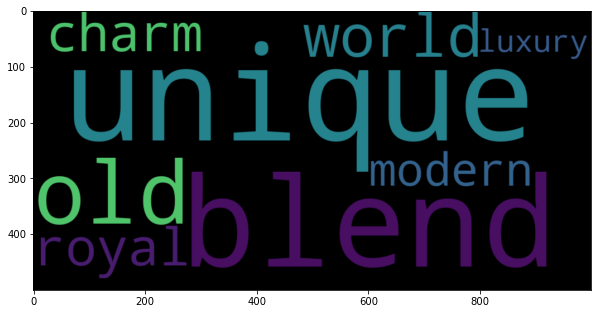

In [225]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=train_reviews[2]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

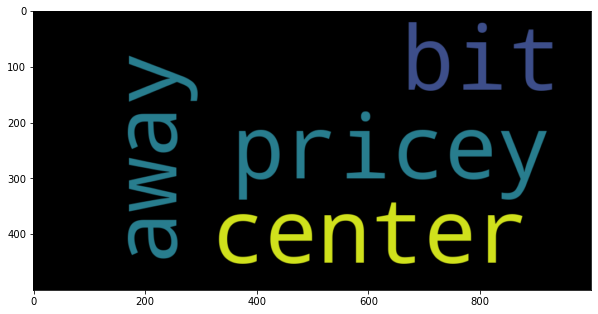

In [224]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=train_reviews[4]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

## LSTM

In [167]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, GRU,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *

In [168]:
print(train_reviews)

0       yes really great experience visited various pl...
1                           explain word grand place look
2        unique blend old world royal charm modern luxury
3                    definitely going whenever get chance
4                                  bit pricey away center
                              ...                        
1345                                  owner speak english
1346                                         recieve bill
1347                                 room loud old winows
1348                      room dirty bug running th floor
1349    bath clean recieved room empty shower bottle g...
Name: Text, Length: 1350, dtype: object


In [169]:
tokenizer = Tokenizer(num_words=1000, lower=True,split=' ')
tokenizer.fit_on_texts(df_lemm['Text'].values)

X = tokenizer.texts_to_sequences(df_lemm['Text'].values)
X = pad_sequences(X)

In [170]:
tokenizer.word_index

{'hotel': 1,
 'room': 2,
 'good': 3,
 'staff': 4,
 'nice': 5,
 'great': 6,
 'food': 7,
 'friendly': 8,
 'clean': 9,
 'breakfast': 10,
 'stay': 11,
 'excellent': 12,
 'restaurant': 13,
 'location': 14,
 'service': 15,
 'place': 16,
 'would': 17,
 'really': 18,
 'one': 19,
 'beach': 20,
 'well': 21,
 'small': 22,
 'area': 23,
 'holiday': 24,
 'best': 25,
 'city': 26,
 'bathroom': 27,
 'close': 28,
 'time': 29,
 'also': 30,
 'bar': 31,
 'u': 32,
 'pool': 33,
 'everything': 34,
 'free': 35,
 'like': 36,
 'day': 37,
 'lot': 38,
 'old': 39,
 'next': 40,
 'little': 41,
 'star': 42,
 'helpful': 43,
 'choice': 44,
 'always': 45,
 'night': 46,
 'view': 47,
 'recommend': 48,
 'center': 49,
 'perfect': 50,
 'comfortable': 51,
 'price': 52,
 'could': 53,
 'bed': 54,
 'around': 55,
 'back': 56,
 'get': 57,
 'quite': 58,
 'modern': 59,
 'even': 60,
 'go': 61,
 'facility': 62,
 'stayed': 63,
 'beautiful': 64,
 'located': 65,
 'better': 66,
 'need': 67,
 'minute': 68,
 '2': 69,
 'walk': 70,
 'people': 

In [171]:
print(df_lemm['Text'].values)

['yes really great experience visited various place wonderful part trip stay oberoi udaivilas luxury hotel'
 'explain word grand place look'
 'unique blend old world royal charm modern luxury' ...
 'hospitality service highest level' 'definitely come back' 'best class']


In [172]:
X

array([[  0,   0,   0, ...,  11, 183,   1],
       [  0,   0,   0, ..., 732,  16, 184],
       [  0,   0,   0, ..., 260,  59, 183],
       ...,
       [  0,   0,   0, ..., 713,  15, 286],
       [  0,   0,   0, ...,  80, 106,  56],
       [  0,   0,   0, ...,   0,  25, 692]])

In [173]:
embed_dim = 100
lstm_out = 50
batch_size = 32

model = Sequential()
model.add(Embedding(1000, embed_dim,input_length = X.shape[1]))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 46, 100)           100000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 46, 100)           80400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 46, 50)            30200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 218,226
Trainable params: 218,226
Non-trainable params: 0
_________________________________________________________________
None


In [174]:
Y = sentiment_data

In [175]:
Y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['acc'])
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=10,batch_size =32)

Epoch 1/10
40/40 [==============================] - 12s 152ms/step - loss: 0.6233 - acc: 0.6999 - val_loss: 0.5657 - val_acc: 0.7429
Epoch 2/10
40/40 [==============================] - 3s 87ms/step - loss: 0.5914 - acc: 0.7176 - val_loss: 0.5600 - val_acc: 0.7500
Epoch 3/10
40/40 [==============================] - 3s 82ms/step - loss: 0.5023 - acc: 0.7526 - val_loss: 0.4825 - val_acc: 0.7714
Epoch 4/10
40/40 [==============================] - 3s 81ms/step - loss: 0.3052 - acc: 0.8821 - val_loss: 0.5040 - val_acc: 0.7643
Epoch 5/10
40/40 [==============================] - 3s 80ms/step - loss: 0.2432 - acc: 0.9121 - val_loss: 0.5667 - val_acc: 0.7714
Epoch 6/10
40/40 [==============================] - 3s 80ms/step - loss: 0.1992 - acc: 0.9228 - val_loss: 0.6653 - val_acc: 0.7857
Epoch 7/10
40/40 [==============================] - 3s 79ms/step - loss: 0.1507 - acc: 0.9487 - val_loss: 0.7394 - val_acc: 0.7786
Epoch 8/10
40/40 [==============================] - 3s 79ms/step - loss: 0.1244 -

In [177]:
score,acc_lstm = model.evaluate(X_test,Y_test,batch_size=32)
print("score: %.2f" %(score))
print("accuracy: %.2f" %(acc_lstm))

5/5 [==============================] - 0s 24ms/step - loss: 0.9000 - acc: 0.7571
score: 0.90
accuracy: 0.76


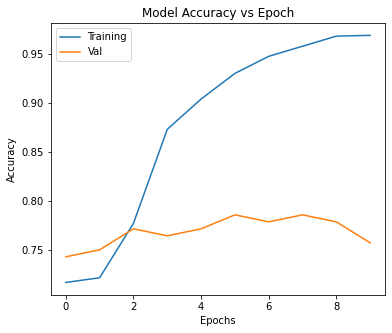

In [178]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,5))
plt.plot(history.history['acc'], label='Training')
plt.plot(history.history['val_acc'], label='Val')
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [179]:
print("Prediction: ",model.predict_classes(X_test[5:10]))
print("Actual: \n",Y_test[5:10])

C:\Users\bluecoder\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction:  [[1]
 [1]
 [0]
 [0]
 [0]]
Actual: 
 [[1]
 [1]
 [1]
 [0]
 [0]]


In [346]:
result["LSTM"] = acc_lstm

# CNN

In [182]:
#using padded sequence
X

array([[  0,   0,   0, ...,  11, 183,   1],
       [  0,   0,   0, ..., 732,  16, 184],
       [  0,   0,   0, ..., 260,  59, 183],
       ...,
       [  0,   0,   0, ..., 713,  15, 286],
       [  0,   0,   0, ...,  80, 106,  56],
       [  0,   0,   0, ...,   0,  25, 692]])

In [183]:
model_cnn = Sequential()
model_cnn.add(Embedding(2000,embed_dim,input_length=X.shape[1]))
model_cnn.add(Conv1D(64,3,activation='relu'))
model_cnn.add(MaxPooling1D(2,2))
model_cnn.add(Conv1D(32,3,activation='relu'))
model_cnn.add(MaxPooling1D(2,2))
model_cnn.add(Flatten())
model_cnn.add(Dense(8,activation='relu'))
model_cnn.add(Dense(1,activation='sigmoid'))
model_cnn.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['acc'])
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 46, 100)           200000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 44, 64)            19264     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 22, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 20, 32)            6176      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 42)
history_cnn = model_cnn.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=10,batch_size =32)

Epoch 1/10
42/42 [==============================] - 1s 18ms/step - loss: 0.6355 - acc: 0.7237 - val_loss: 0.5778 - val_acc: 0.7286
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.5684 - acc: 0.7329 - val_loss: 0.5149 - val_acc: 0.7286
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.4822 - acc: 0.6959 - val_loss: 0.4276 - val_acc: 0.7429
Epoch 4/10
42/42 [==============================] - 0s 12ms/step - loss: 0.3255 - acc: 0.8434 - val_loss: 0.4895 - val_acc: 0.7857
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 0.2780 - acc: 0.9072 - val_loss: 0.5285 - val_acc: 0.8000
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 0.2510 - acc: 0.9413 - val_loss: 0.6172 - val_acc: 0.7714
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 0.2221 - acc: 0.9605 - val_loss: 0.6319 - val_acc: 0.7714
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 0.2242 - a

In [114]:
score,acc_cnn = model_cnn.evaluate(X_test,Y_test,batch_size=32)
print("score: %.2f" %(score))
print("accuracy: %.2f" %(acc_cnn))

3/3 [==============================] - 0s 7ms/step - loss: 0.7976 - acc: 0.7300
score: 0.80
accuracy: 0.73


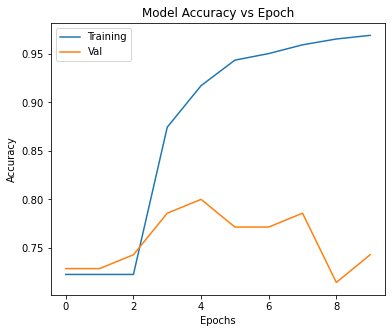

In [185]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,5))

plt.plot(history_cnn.history['acc'], label='Training')
plt.plot(history_cnn.history['val_acc'], label='Val')
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

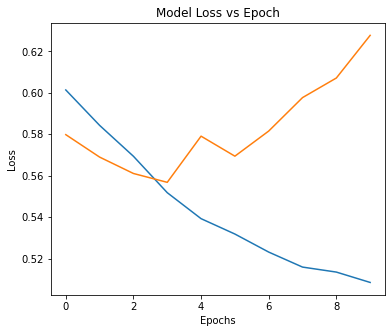

In [255]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,5))

plt.plot(history_cnn.history['loss'], label='Training')
plt.plot(history_cnn.history['val_loss'], label='Val')
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [347]:
result["CNN"] = acc

In [348]:
result

{'Logistic Regression BOW': 0.74,
 'Logistic Regression TFidf': 0.74,
 'SGD BOW': 0.76,
 'SGD TF-IDF': 0.5,
 'Naive bias BOW': 0.5,
 'Naive bias TF-IDF': 0.5,
 'LSTM': 0.7714285850524902,
 'CNN': 0.7300000190734863}

In [350]:
result_df = pd.DataFrame(result,index=[0])

In [351]:
result_df

,Logistic Regression BOW,Logistic Regression TFidf,SGD BOW,SGD TF-IDF,Naive bias BOW,Naive bias TF-IDF,LSTM,CNN
0,0.74,0.74,0.76,0.5,0.5,0.5,0.771429,0.73


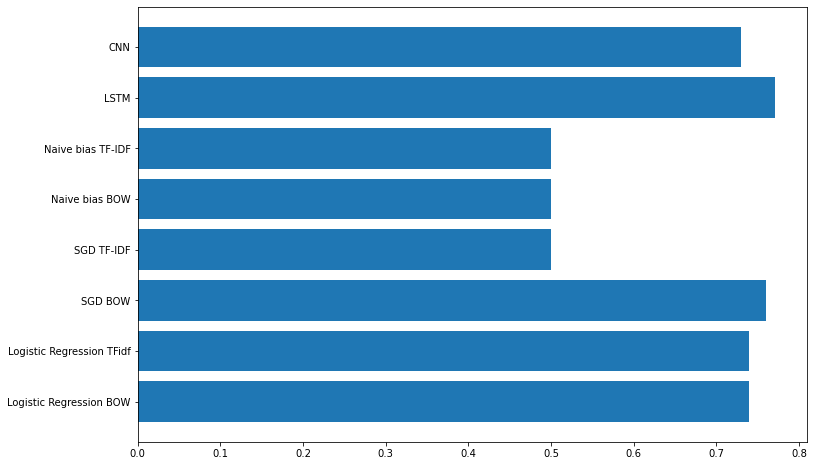

In [361]:
names = list(result.keys())
values = list(result.values())
plt.figure(figsize=(12,8))
plt.barh(range(len(result)), values, tick_label=names)
plt.show()

# Model with multiple output

In [31]:
df_intensity.shape

(1400, 3)

In [32]:
train_reviews_in = df_intensity.Text[:1350]
test_reviews_in = df_intensity.Text[1350:]

In [33]:
print(train_reviews_in.shape)
print(test_reviews_in.shape)

(1350,)
(50,)


In [34]:
#Count Vectorizer
cv_in = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cvin_train_reviews=cv_in.fit_transform(train_reviews_in)
cvin_test_reviews=cv_in.transform(test_reviews_in)

#TF-IDF vectorizer
#It is used to convert text documents to matrix of tfidf features
tv_in = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tvin_train_reviews = tv_in.fit_transform(train_reviews_in)
tvin_test_reviews = tv_in.transform(test_reviews_in)

In [35]:
print('Count Vectorizer:')
print(cvin_train_reviews.shape)
print(cvin_test_reviews.shape)

print("Tf-Idf Vectorizer")
print(tvin_train_reviews.shape)
print(tvin_test_reviews.shape)


Count Vectorizer:
(1350, 13284)
(50, 13284)
Tf-Idf Vectorizer
(1350, 13284)
(50, 13284)


In [36]:
#Spliting the sentiment data
train_sentiments_in = df_intensity.iloc[:1350,1:]
test_sentiments_in = df_intensity.iloc[1350:,1:]
print(train_sentiments_in.shape)
print(test_sentiments_in.shape)

(1350, 2)
(50, 2)


## Random forest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(rf_in,cvin_train_reviews,train_sentiments_in,cv=5)

RandomForestClassifier(max_depth=2, n_estimators=5)

In [50]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [52]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(cvin_train_reviews,train_sentiments_in)
print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.44 (+/-0.035) for {'max_depth': 2, 'n_estimators': 5}
0.44 (+/-0.035) for {'max_depth': 2, 'n_estimators': 50}
0.44 (+/-0.035) for {'max_depth': 2, 'n_estimators': 100}
0.44 (+/-0.035) for {'max_depth': 10, 'n_estimators': 5}
0.44 (+/-0.035) for {'max_depth': 10, 'n_estimators': 50}
0.44 (+/-0.035) for {'max_depth': 10, 'n_estimators': 100}
0.44 (+/-0.035) for {'max_depth': 20, 'n_estimators': 5}
0.44 (+/-0.035) for {'max_depth': 20, 'n_estimators': 50}
0.44 (+/-0.035) for {'max_depth': 20, 'n_estimators': 100}
0.304 (+/-0.107) for {'max_depth': None, 'n_estimators': 5}
0.304 (+/-0.107) for {'max_depth': None, 'n_estimators': 50}
0.304 (+/-0.107) for {'max_depth': None, 'n_estimators': 100}


In [55]:
rf_in = RandomForestClassifier(n_estimators=5,max_depth=2)
rf_in.fit(cvin_train_reviews,train_sentiments_in)

RandomForestClassifier(max_depth=2, n_estimators=5)

In [57]:
# Accuracy 
y_predict = rf_in.predict(cvin_test_reviews)
accuracy = accuracy_score(test_sentiments_in, y_predict)
print("Random forest Score:",accuracy*100)

Random forest Score: 44.0


In [58]:
from sklearn import metrics
class_wise = metrics.classification_report(y_true=test_sentiments_in, y_pred=rf_in.predict(cvin_test_reviews))
print(class_wise)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        37
           1       0.00      0.00      0.00        16

   micro avg       0.74      0.70      0.72        53
   macro avg       0.37      0.50      0.43        53
weighted avg       0.52      0.70      0.59        53
 samples avg       0.74      0.59      0.64        53



In [59]:
predictions = pd.DataFrame(y_predict)
predictions.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [60]:
predictions = pd.DataFrame(train_sentiments_in)
predictions.head()

,Polarity,Intensity
0,1,0
1,1,0
2,1,1
3,1,1
4,0,0


### LSTM

In [62]:
print(train_reviews_in)

0       ye realli great experi visit variou place wond...
1                           explain word grand place look
2         uniqu blend old world royal charm modern luxuri
3                             definit go whenev get chanc
4                                  bit pricey away center
                              ...                        
1345                                  owner speak english
1346                                          reciev bill
1347                                  room loud old winow
1348                          room dirti bug run th floor
1349    bath clean reciev room empti shower bottl gues...
Name: Text, Length: 1350, dtype: object


In [93]:
total = df_intensity.Text.values
max_len = max([len(x.split()) for x in total])
max_len

61

In [94]:
tokenizer = Tokenizer(num_words=1500, lower=True,split=' ')
tokenizer.fit_on_texts(df_intensity['Text'].values)

X = tokenizer.texts_to_sequences(df_intensity['Text'].values)
X = pad_sequences(X,maxlen = max_len)

In [64]:
tokenizer.word_index

{'hotel': 1,
 'room': 2,
 'good': 3,
 'staff': 4,
 'stay': 5,
 'nice': 6,
 'great': 7,
 'clean': 8,
 'food': 9,
 'locat': 10,
 'friendli': 11,
 'breakfast': 12,
 'excel': 13,
 'restaur': 14,
 'servic': 15,
 'well': 16,
 'place': 17,
 'would': 18,
 'beach': 19,
 'realli': 20,
 'one': 21,
 'small': 22,
 'help': 23,
 'area': 24,
 'holiday': 25,
 'best': 26,
 'close': 27,
 'walk': 28,
 'citi': 29,
 'recommend': 30,
 'like': 31,
 'bathroom': 32,
 'time': 33,
 'also': 34,
 'bar': 35,
 'u': 36,
 'comfort': 37,
 'go': 38,
 'pool': 39,
 'everyth': 40,
 'park': 41,
 'even': 42,
 'free': 43,
 'day': 44,
 'price': 45,
 'lot': 46,
 'old': 47,
 'next': 48,
 'littl': 49,
 'star': 50,
 'choic': 51,
 'alway': 52,
 'night': 53,
 'enjoy': 54,
 'look': 55,
 'get': 56,
 'view': 57,
 'work': 58,
 'bed': 59,
 'love': 60,
 'back': 61,
 'center': 62,
 'quit': 63,
 'offer': 64,
 'perfect': 65,
 'could': 66,
 'around': 67,
 'need': 68,
 'relax': 69,
 'beauti': 70,
 'busi': 71,
 'modern': 72,
 'book': 73,
 'expec

In [88]:
print(df_intensity['Text'].values)

['ye realli great experi visit variou place wonder part trip stay oberoi udaivila luxuri hotel'
 'explain word grand place look'
 'uniqu blend old world royal charm modern luxuri' ...
 'hospit servic highest level' 'definit come back' 'best class']


In [89]:
X.shape

(1400, 46)

In [90]:
embed_dim = 100
lstm_out = 50
batch_size = 32

model = Sequential()
model.add(Embedding(1500, embed_dim,input_length = X.shape[1]))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(2,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 46, 100)           150000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 46, 100)           80400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 46, 50)            30200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 52        
Total params: 268,252
Trainable params: 268,252
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
Y = df_intensity.iloc[:,1:]

In [92]:
Y

,Polarity,Intensity
0,1,0
1,1,0
2,1,1
3,1,1
4,0,0
...,...,...
1395,1,0
1396,1,0
1397,1,1
1398,1,1


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['acc'])
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=10,batch_size =32)

Epoch 1/10
40/40 [==============================] - 20s 189ms/step - loss: 0.6381 - acc: 0.9470 - val_loss: 0.6004 - val_acc: 0.9571
Epoch 2/10
40/40 [==============================] - 7s 165ms/step - loss: 0.6073 - acc: 0.9521 - val_loss: 0.5900 - val_acc: 0.9571
Epoch 3/10
40/40 [==============================] - 4s 112ms/step - loss: 0.5832 - acc: 0.9537 - val_loss: 0.5735 - val_acc: 0.9357
Epoch 4/10
40/40 [==============================] - 4s 112ms/step - loss: 0.5011 - acc: 0.9362 - val_loss: 0.5465 - val_acc: 0.9357
Epoch 5/10
40/40 [==============================] - 6s 161ms/step - loss: 0.4357 - acc: 0.9443 - val_loss: 0.5871 - val_acc: 0.8929
Epoch 6/10
40/40 [==============================] - 4s 112ms/step - loss: 0.3804 - acc: 0.8878 - val_loss: 0.6394 - val_acc: 0.8429
Epoch 7/10
40/40 [==============================] - 5s 114ms/step - loss: 0.3604 - acc: 0.8487 - val_loss: 0.6164 - val_acc: 0.8643
Epoch 8/10
40/40 [==============================] - 5s 131ms/step - loss: 0

In [94]:
score,acc_lstm = model.evaluate(X_test,Y_test,batch_size=32)
print("score: %.2f" %(score))
print("accuracy: %.2f" %(acc_lstm))

5/5 [==============================] - 0s 30ms/step - loss: 0.7540 - acc: 0.7143
score: 0.75
accuracy: 0.71


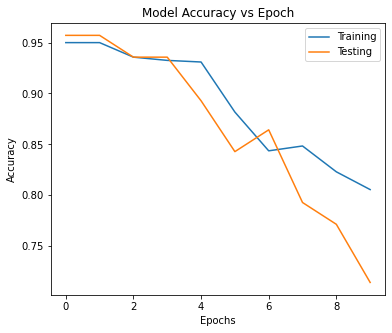

In [95]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,5))

plt.plot(history.history['acc'], label='Training')
plt.plot(history.history['val_acc'], label='Testing')
plt.title('Model Accuracy vs Epoch')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [81]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame(y_pred)
prediction.head()

,0,1
0,0.132909,0.099123
1,0.977925,0.960064
2,0.977177,0.017985
3,0.014986,0.012215
4,0.062417,0.007451


In [87]:
prediction[0] = prediction[0].apply(lambda x: round(x))
prediction[1] = prediction[1].apply(lambda x: round(x))

In [88]:
prediction.head()

,0,1
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0


In [83]:
Y_test.head()

,Polarity,Intensity
665,0,0
624,1,1
115,1,0
478,1,0
233,1,0


# BERT for Sentiment Analysis

In [35]:
df_lemm.head()

,Text,Polarity
0,yes really great experience visited various pl...,Positive
1,explain word grand place look,Positive
2,unique blend old world royal charm modern luxury,Positive
3,definitely going whenever get chance,Positive
4,bit pricey away center,Negative


In [36]:
train = df_lemm.iloc[0:1390,:]
test = df_lemm.iloc[1390:,:]

In [41]:
# code
# Convert training data into BERT format
train_bert = pd.DataFrame({
  'guid': range(len(train)),
 'label':train['Polarity'],
 'alpha': ['a']*train.shape[0],
 'text': train['Text'].replace(r'\n', '', regex = True)
})
train_bert.head()


,guid,label,alpha,text
0,0,Positive,a,yes really great experience visited various pl...
1,1,Positive,a,explain word grand place look
2,2,Positive,a,unique blend old world royal charm modern luxury
3,3,Positive,a,definitely going whenever get chance
4,4,Negative,a,bit pricey away center


In [42]:
# convert test data into bert format
bert_test = pd.DataFrame({
 'id':range(len(test)),
 'text': test['Text'].replace(r'\n', ' ', regex = True)
})
bert_test.head()

,id,text
1390,0,noisy poor room insulation
1391,1,carpet hotel instead wooden floor spread maxim...
1392,2,usually hear noise even 3am 4
1393,3,experience worse hostel
1394,4,excelent place golf beach


In [44]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import csv
from sklearn import metrics


In [47]:
# split data into train and validation set
bert_train, bert_val = train_test_split(train_bert, test_size = 0.1)
# save train, validation and testfile to afolder
bert_train.to_csv('bert/Hotel_Dataset/train.tsv', sep ='\t', index = False, header = False)
bert_val.to_csv('bert/Hotel_Dataset/dev.tsv', sep ='\t', index = False, header = False)
bert_test.to_csv('bert/Hotel_Dataset/test.tsv', sep ='\t', index = False, header = True)

In [61]:

# Most of the arguments  hereare self-explanatory but some  arguments needs  to be explained:
# task name:We have discussed this above .Here we need toperform binary  classification that why we use cola
# vocab file :  A vocab file (vocab.txt) to map WordPiece to word id.
# init checkpoint:  A tensorflow checkpoint required. Here we used downloaded bert.
# max_seq_length :caps the maximunumber of words  to each reviews
# bert_config_file: file contains hyperparameter settings ! python bert / run_classifier.py
--task_name = cola --do_train = true --do_eval = true
--data_dir =bert/Hotel_Dataset
--vocab_file =uncased/vocab.txt
--bert_config_file =uncased/bert_config.json
--init_checkpoint =uncased/bert_model.ckpt
--max_seq_length = 64
--train_batch_size = 8 --learning_rate = 2e-5
--num_train_epochs = 3.0
--output_dir =bert_output
--do_lower_case = True

SyntaxError: cannot assign to operator (<ipython-input-61-789f3ab631a5>, line 7)